In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
djoko_df = pd.read_csv('/Users/mateus/Downloads/Novak_Stats.csv')
nadal_df = pd.read_csv('/Users/mateus/Downloads/Rafael_Stats.csv')
federer_df = pd.read_csv('/Users/mateus/Downloads/Roger_Stats.csv')

In [3]:
djoko_df.head()

,Year,Tournament,Surface,Rd,Rk,vRk,Opponent,Result,Score,Dominance_Ratio,...,1st%,2nd%,Break_Points_Saved,Total_Points_Won,Return_Points_Won,Ace_Rate_Against,1st_return%,2nd_return%,Break_Points_Converted,Time
0,2021,Wimbledon,Grass,F,1,9,Matteo Berrettini,W,6-7(4) 6-4 6-4 6-3,1.27,...,0.79,0.53,5/7,0.53,0.40,0.10,0.24,0.62,6/15,3:24
1,2021,Wimbledon,Grass,SF,1,12,Denis Shapovalov,W,7-6(3) 7-5 7-5,1.17,...,0.81,0.57,10/11,0.53,0.33,0.05,0.21,0.58,3/10,2:44
2,2021,Wimbledon,Grass,QF,1,48,Marton Fucsovics,W,6-3 6-4 6-4,1.40,...,0.82,0.44,5/6,0.56,0.44,0.05,0.42,0.47,4/14,2:17
3,2021,Wimbledon,Grass,R16,1,20,Christian Garin,W,6-2 6-4 6-2,2.49,...,0.92,0.64,2/2,0.63,0.48,0.02,0.44,0.54,5/12,1:49
4,2021,Wimbledon,Grass,R32,1,114,Denis Kudla,W,6-4 6-3 7-6(7),1.35,...,0.88,0.50,2/4,0.55,0.40,0.06,0.33,0.45,4/10,2:17


In [4]:
nadal_df.head()

,Year,Tournament,Surface,Rd,Rk,vRk,Opponent,Result,Score,Dominance_Ratio,...,1st%,2nd%,Break_Points_Saved,Total_Points_Won,Return_Points_Won,Ace_Rate_Against,1st_return%,2nd_return%,Break_Points_Converted,Time
0,2021,Roland Garros,Clay,SF,3,1,Novak Djokovic,L,3-6 6-3 7-6(4) 6-2,0.86,...,0.59,0.40,14/22,0.47,0.41,0.05,0.35,0.50,6/16,4:11
1,2021,Roland Garros,Clay,QF,3,10,Diego Sebastian Schwartzman,W,6-3 4-6 6-4 6-0,1.60,...,0.73,0.68,1/4,0.58,0.46,0.03,0.41,0.54,7/14,2:45
2,2021,Roland Garros,Clay,R16,3,19,Jannik Sinner,W,7-5 6-3 6-0,1.69,...,0.81,0.43,3/7,0.62,0.59,0.00,0.58,0.62,9/14,2:17
3,2021,Roland Garros,Clay,R32,3,45,Cameron Norrie,W,6-3 6-3 6-3,1.59,...,0.79,0.55,1/3,0.59,0.48,0.03,0.44,0.55,6/12,2:07
4,2021,Roland Garros,Clay,R64,3,53,Richard Gasquet,W,6-0 7-5 6-2,1.62,...,0.84,0.47,3/4,0.59,0.51,0.02,0.30,0.73,7/16,2:14


In [5]:
federer_df.head()

,Year,Tournament,Surface,Rd,Rk,vRk,Opponent,Result,Score,Dominance_Ratio,...,1st%,2nd%,Break_Points_Saved,Total_Points_Won,Return_Points_Won,Ace_Rate_Against,1st_return%,2nd_return%,Break_Points_Converted,Time
0,2021,Wimbledon,Grass,QF,8,18,Hubert Hurkacz,L,6-3 7-6(4) 6-0,0.68,...,0.67,0.33,10/15,0.43,0.31,0.11,0.21,0.44,1/4,1:49
1,2021,Wimbledon,Grass,R16,8,27,Lorenzo Sonego,W,7-5 6-4 6-2,1.58,...,0.79,0.65,2/3,0.55,0.43,0.04,0.34,0.56,5/15,2:11
2,2021,Wimbledon,Grass,R32,8,34,Cameron Norrie,W,6-4 6-4 5-7 6-4,1.33,...,0.74,0.66,2/4,0.54,0.39,0.09,0.32,0.51,4/11,2:35
3,2021,Wimbledon,Grass,R64,8,56,Richard Gasquet,W,7-6(1) 6-1 6-4,1.61,...,0.84,0.58,5/5,0.58,0.41,0.03,0.35,0.49,3/6,1:51
4,2021,Wimbledon,Grass,R128,8,41,Adrian Mannarino,W,6-4 6-7(3) 3-6 6-2 RET,1.16,...,0.74,0.61,6/8,0.51,0.36,0.04,0.24,0.57,4/13,2:44


<h1> Pré-Processamento </h1>

In [6]:
djoko_df.isnull().sum()

Year                      0
Tournament                0
Surface                   0
Rd                        0
Rk                        0
vRk                       0
Opponent                  0
Result                    0
Score                     0
Dominance_Ratio           1
Ace_Rate                  1
Double_Fault_Rate         1
1st_In                    1
1st%                      1
2nd%                      1
Break_Points_Saved        1
Total_Points_Won          1
Return_Points_Won         1
Ace_Rate_Against          1
1st_return%               1
2nd_return%               1
Break_Points_Converted    1
Time                      1
dtype: int64

In [7]:
nadal_df.isnull().sum()

Year                      0
Tournament                0
Surface                   0
Rd                        0
Rk                        0
vRk                       0
Opponent                  0
Result                    0
Score                     0
Dominance_Ratio           2
Ace_Rate                  2
Double_Fault_Rate         2
1st_In                    2
1st%                      2
2nd%                      2
Break_Points_Saved        2
Total_Points_Won          2
Return_Points_Won         2
Ace_Rate_Against          2
1st_return%               2
2nd_return%               2
Break_Points_Converted    2
Time                      2
dtype: int64

In [8]:
federer_df.isnull().sum()

Year                      0
Tournament                0
Surface                   0
Rd                        0
Rk                        0
vRk                       0
Opponent                  0
Result                    0
Score                     0
Dominance_Ratio           3
Ace_Rate                  3
Double_Fault_Rate         3
1st_In                    3
1st%                      3
2nd%                      3
Break_Points_Saved        3
Total_Points_Won          3
Return_Points_Won         3
Ace_Rate_Against          3
1st_return%               3
2nd_return%               3
Break_Points_Converted    3
Time                      3
dtype: int64

In [9]:
djoko_df[djoko_df['Dominance_Ratio'].isnull()]

,Year,Tournament,Surface,Rd,Rk,vRk,Opponent,Result,Score,Dominance_Ratio,...,1st%,2nd%,Break_Points_Saved,Total_Points_Won,Return_Points_Won,Ace_Rate_Against,1st_return%,2nd_return%,Break_Points_Converted,Time
103,2016,US Open,Hard,R64,1,49,Jiri Vesely,W,W/O,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
nadal_df[nadal_df['Dominance_Ratio'].isnull()]

,Year,Tournament,Surface,Rd,Rk,vRk,Opponent,Result,Score,Dominance_Ratio,...,1st%,2nd%,Break_Points_Saved,Total_Points_Won,Return_Points_Won,Ace_Rate_Against,1st_return%,2nd_return%,Break_Points_Converted,Time
28,2019,US Open,Hard,R64,2,203,Thanasi Kokkinakis,W,W/O,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,2016,Roland Garros,Clay,R32,5,56,Marcel Granollers,L,W/O,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
federer_df[federer_df['Dominance_Ratio'].isnull()]

,Year,Tournament,Surface,Rd,Rk,vRk,Opponent,Result,Score,Dominance_Ratio,...,1st%,2nd%,Break_Points_Saved,Total_Points_Won,Return_Points_Won,Ace_Rate_Against,1st_return%,2nd_return%,Break_Points_Converted,Time
5,2021,Roland Garros,Clay,R16,8,9,Matteo Berrettini,L,W/O,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,2012,US Open,Hard,R16,1,25,Mardy Fish,W,W/O,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,2012,Australian Open,Hard,R64,3,93,Andreas Beck,W,W/O,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Os jogos com valores nulos correspondem à partidas que acabaram em W/O, que não tem razão de entrar para as estatísticas

djoko_df = djoko_df.dropna(how='any',axis=0) 
nadal_df = nadal_df.dropna(how='any',axis=0) 
federer_df = federer_df.dropna(how='any',axis=0) 

In [13]:
# Temos 3 tabelas contendo informações sobre os desempenhos em Grand Slams dos 3 melhores tenistas desse periodo
# Novak Djokovic, Rafael Nadal e Roger Federer. As colunas das tabelas contém os seguintes dados
# Year - Ano do torneio
# Tournament - Nome do torneio
# Surface - Superfície em que o torneio foi realizado
# Rd - Etapa em que o jogo aconteceu
# Rk - Ranking do jogador nesse torneio
# vRk - Ranking do oponente da partida
# Opponent - Oponente da partida
# Result - W (Vitória), L (Derrota)
# Score - Placar da partida
# Dominance_Ratio - % Pontos ganhos devolvendo o saque divido por % Pontos perdidos sacando
# Ace_Rate - % de Aces
# Double_Fault_Rate - % Duplas Faltas
# 1st_in - % Primeiros saques bons
# 1st% - % Pontos ganhos com primeiro saque
# 2nd% - % Pontos ganhos com segundo saque
# Break_Points_Saved - Numero de break points salvos pelo total
# Total_Points_Won - % Pontos ganhos
# Return_Points_Won - % Pontos ganhos devolvendo saque
# Ace_Rate_Against - % Aces recebidos
# 1st_return% - % Pontos ganhos devolvendo o 1o saque
# 2nd_return% - % Pontos ganhos devolvendo o 2o saque
# Break_Points_Converted - Numero de break points convertidos
# Time - Tempo de partida

In [14]:
djoko_df.dtypes

Year                        int64
Tournament                 object
Surface                    object
Rd                         object
Rk                          int64
vRk                         int64
Opponent                   object
Result                     object
Score                      object
Dominance_Ratio           float64
Ace_Rate                  float64
Double_Fault_Rate         float64
1st_In                    float64
1st%                      float64
2nd%                      float64
Break_Points_Saved         object
Total_Points_Won          float64
Return_Points_Won         float64
Ace_Rate_Against          float64
1st_return%               float64
2nd_return%               float64
Break_Points_Converted     object
Time                       object
dtype: object

In [16]:
djoko_df['Tournament'] = djoko_df['Tournament'].astype('category')
nadal_df['Tournament'] = nadal_df['Tournament'].astype('category')
federer_df['Tournament'] = federer_df['Tournament'].astype('category')

djoko_df['Surface'] = djoko_df['Surface'].astype('category')
nadal_df['Surface'] = nadal_df['Surface'].astype('category')
federer_df['Surface'] = federer_df['Surface'].astype('category')

djoko_df['Rd'] = djoko_df['Rd'].astype('category')
nadal_df['Rd'] = nadal_df['Rd'].astype('category')
federer_df['Rd'] = federer_df['Rd'].astype('category')

djoko_df['Result'] = djoko_df['Result'].astype('category')
nadal_df['Result'] = nadal_df['Result'].astype('category')
federer_df['Result'] = federer_df['Result'].astype('category')

djoko_df['Time'] = djoko_df['Time'].astype(str)
nadal_df['Time'] = nadal_df['Time'].astype(str)
federer_df['Time'] = federer_df['Time'].astype(str)

djoko_df['Score'] = djoko_df['Score'].astype(str)
nadal_df['Score'] = nadal_df['Score'].astype(str)
federer_df['Score'] = federer_df['Score'].astype(str)

<h1>Análise Descritiva dos Dados<h1>

In [16]:
nadal_df.describe()

,Year,Rk,vRk,Dominance_Ratio,Ace_Rate,Double_Fault_Rate,1st_In,1st%,2nd%,Total_Points_Won,Return_Points_Won,Ace_Rate_Against,1st_return%,2nd_return%
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2016.354286,2.651429,59.965714,1.604914,0.050800,0.024229,0.671143,0.752171,0.594800,0.570171,0.450286,0.069714,0.376857,0.568629
std,2.880807,2.162556,70.075320,0.564973,0.035273,0.018673,0.062733,0.080857,0.108086,0.054398,0.081857,0.050200,0.094728,0.109557
min,2011.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.510000,0.470000,0.290000,0.370000,0.190000,0.000000,0.130000,0.160000
25%,2014.000000,1.000000,15.000000,1.290000,0.030000,0.010000,0.630000,0.700000,0.530000,0.540000,0.395000,0.030000,0.310000,0.500000
50%,2017.000000,2.000000,42.000000,1.560000,0.050000,0.020000,0.670000,0.760000,0.600000,0.580000,0.460000,0.060000,0.380000,0.560000
75%,2019.000000,3.000000,78.500000,1.825000,0.070000,0.030000,0.710000,0.820000,0.670000,0.600000,0.500000,0.100000,0.435000,0.640000
max,2021.000000,10.000000,570.000000,5.290000,0.190000,0.080000,0.840000,0.910000,0.860000,0.720000,0.710000,0.260000,0.640000,1.000000


<AxesSubplot:xlabel='Result', ylabel='count'>

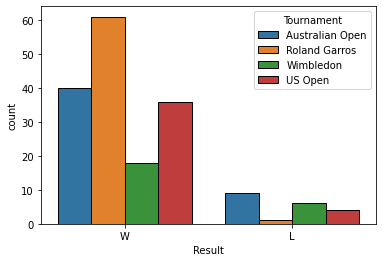

In [17]:
sns.countplot(x="Result", hue="Tournament", data=nadal_df,
             hue_order = ['Australian Open', 'Roland Garros', 'Wimbledon', 'US Open'], order=["W", "L"],
             edgecolor='black')

In [18]:
federer_df.describe()

,Year,Rk,vRk,Dominance_Ratio,Ace_Rate,Double_Fault_Rate,1st_In,1st%,2nd%,Total_Points_Won,Return_Points_Won,Ace_Rate_Against,1st_return%,2nd_return%
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,2015.676301,3.838150,55.369942,1.623410,0.115029,0.020116,0.644277,0.797283,0.595260,0.559249,0.412312,0.057283,0.345954,0.521272
std,2.778523,3.113612,73.730588,0.587078,0.056421,0.016844,0.054359,0.073794,0.100837,0.053494,0.073937,0.042837,0.091244,0.096518
min,2011.000000,1.000000,1.000000,0.560000,0.000000,0.000000,0.430000,0.560000,0.330000,0.420000,0.240000,0.000000,0.120000,0.270000
25%,2013.000000,2.000000,13.000000,1.240000,0.080000,0.010000,0.610000,0.750000,0.520000,0.530000,0.360000,0.030000,0.290000,0.460000
50%,2015.000000,3.000000,38.000000,1.550000,0.110000,0.020000,0.640000,0.800000,0.580000,0.560000,0.410000,0.050000,0.340000,0.510000
75%,2018.000000,3.000000,75.000000,1.990000,0.150000,0.030000,0.680000,0.840000,0.670000,0.600000,0.460000,0.080000,0.400000,0.580000
max,2021.000000,17.000000,772.000000,4.200000,0.360000,0.080000,0.770000,0.950000,0.820000,0.690000,0.670000,0.200000,0.600000,0.850000


<AxesSubplot:xlabel='Result', ylabel='count'>

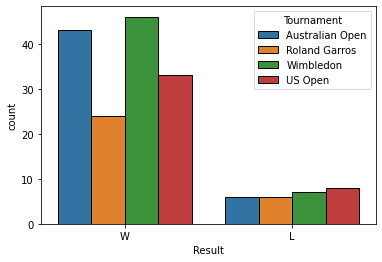

In [19]:
sns.countplot(x="Result", hue="Tournament", data=federer_df,
             hue_order = ['Australian Open', 'Roland Garros', 'Wimbledon', 'US Open'], order=["W", "L"],
             edgecolor='black')

In [20]:
djoko_df.describe()

,Year,Rk,vRk,Dominance_Ratio,Ace_Rate,Double_Fault_Rate,1st_In,1st%,2nd%,Total_Points_Won,Return_Points_Won,Ace_Rate_Against,1st_return%,2nd_return%
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,2016.021277,2.646809,50.229787,1.659404,0.081745,0.023660,0.663617,0.765319,0.595702,0.568979,0.445660,0.059957,0.361191,0.573106
std,3.003483,4.760811,61.874342,0.690446,0.055207,0.019442,0.053318,0.078005,0.104046,0.052108,0.074294,0.043190,0.083468,0.095381
min,2011.000000,1.000000,1.000000,0.620000,0.000000,0.000000,0.510000,0.500000,0.360000,0.420000,0.240000,0.000000,0.070000,0.280000
25%,2013.000000,1.000000,9.000000,1.240000,0.040000,0.010000,0.625000,0.720000,0.530000,0.540000,0.390000,0.030000,0.300000,0.500000
50%,2016.000000,1.000000,31.000000,1.470000,0.070000,0.020000,0.660000,0.760000,0.580000,0.570000,0.440000,0.050000,0.360000,0.570000
75%,2019.000000,2.000000,67.000000,1.885000,0.110000,0.030000,0.700000,0.820000,0.670000,0.600000,0.490000,0.080000,0.410000,0.635000
max,2021.000000,22.000000,589.000000,5.720000,0.320000,0.100000,0.830000,1.000000,0.890000,0.770000,0.730000,0.240000,0.610000,0.930000


<AxesSubplot:xlabel='Result', ylabel='count'>

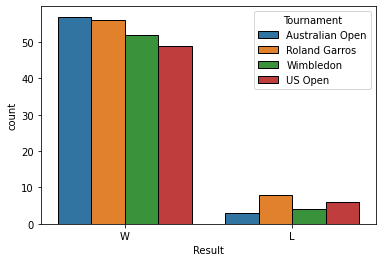

In [21]:
sns.countplot(x="Result", hue="Tournament", data=djoko_df,
             hue_order = ['Australian Open', 'Roland Garros', 'Wimbledon', 'US Open'], order=["W", "L"],
             edgecolor='black')

In [22]:
# Novak Djokovic apresenta o melhor desempenho dos 3 tenistas nos ultimos 10 anos
# com numeros grandes de vitorias nos 4 Grand Slams. O de maior sucesso é o Australian Open,
# o que ja era de se esperar, ja que em toda sua carreira foi o torneio que mais venceu
# com um total de 9 titulos
# Rafael Nadal possui uma quantidade muito maior de vitorias em Roland Garros, onde, ao longo de sua carreira
# conquistou 13 titulos, um recorde muito difícil de ser alcançado
# O Grand Slam que possui menos sucesso é o Australian Open, e podemos ver no gráfico que é o torneio em que possui
# mais eliminações
# Roger Federer teve seu maior sucesso nos torneios de Wimbledon, o que fica evidente pelo seu maior numero de vitorias
# nessa competicao, na qual, embora não tenha conquistado tantos titulos nos ultimos 10 anos, possui um total de 9 taças.

In [23]:

print("Numero de finais de Novak Djokovic")
print(djoko_df[djoko_df['Rd'] == 'F']['Rd'].count())

print("Numero de finais de Rafael Nadal")
print(nadal_df[nadal_df['Rd'] == 'F']['Rd'].count())

print("Numero de finais de Roger Federer")
print(federer_df[federer_df['Rd'] == 'F']['Rd'].count())

Numero de finais de Novak Djokovic
25
Numero de finais de Rafael Nadal
15
Numero de finais de Roger Federer
8


In [24]:
print("Numero de titulos de Novak Djokovic")
print(djoko_df[(djoko_df['Rd'] == 'F') & (djoko_df['Result'] == "W")]['Rd'].count())

print("Numero de titulos de Rafael Nadal")
print(nadal_df[(nadal_df['Rd'] == 'F') & (nadal_df['Result'] == "W")]['Rd'].count())

print("Numero de titulos de Roger Federer")
print(federer_df[(federer_df['Rd'] == 'F') & (federer_df['Result'] == "W")]['Rd'].count())

Numero de titulos de Novak Djokovic
17
Numero de titulos de Rafael Nadal
10
Numero de titulos de Roger Federer
4


In [25]:
print("O que nos da um aproveitamento em finais de: ")
print(str(round((17/25 * 100),2)) + "% para Djokovic")
print(str(round((10/15 * 100),2)) + "% para Nadal")
print(str(round((4/8 * 100),2)) + "% para Federer")

O que nos da um aproveitamento em finais de: 
68.0% para Djokovic
66.67% para Nadal
50.0% para Federer


In [31]:
print("O tempo medio que cada jogador passou em quadra foi de: ")
mean_time_minutes = djoko_df['Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])).mean()
mean_time = str(int(mean_time_minutes//60))+'h'+ str(int(mean_time_minutes%60))+'min'
print(mean_time + " para Djokovic")
      
mean_time_minutes = nadal_df['Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])).mean()
mean_time = str(int(mean_time_minutes//60))+'h'+ str(int(mean_time_minutes%60))+'min'
print(mean_time + " para Nadal")
    
mean_time_minutes = federer_df['Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])).mean()
mean_time = str(int(mean_time_minutes//60))+'h'+ str(int(mean_time_minutes%60))+'min'
print(mean_time + " para Federer")

O tempo medio que cada jogador passou em quadra foi de: 
2h26min para Djokovic
2h33min para Nadal
2h9min para Federer


In [78]:
djoko_df['Player'] = 'Novak Djokovic'
nadal_df['Player'] = 'Rafael Nadal'
federer_df['Player'] = 'Roger Federer'

In [79]:
d = {'Player': djoko_df['Player'], '1st_In': djoko_df['1st_In']}
djoko_serves_df = pd.DataFrame(d)

d = {'Player': federer_df['Player'], '1st_In': federer_df['1st_In']}
federer_serves_df = pd.DataFrame(d)

d = {'Player': nadal_df['Player'], '1st_In': nadal_df['1st_In']}
nadal_serves_df = pd.DataFrame(d)

In [80]:
saques = pd.concat([djoko_serves_df, nadal_serves_df, federer_serves_df], axis=0)

<AxesSubplot:xlabel='Player', ylabel='1st_In'>

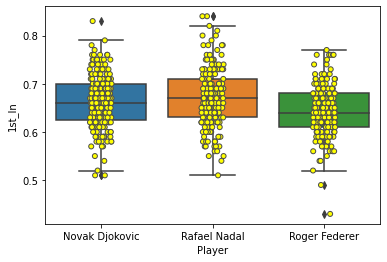

In [177]:
sns.boxplot(data=saques, x='Player', y='1st_In')
sns.stripplot(data=saques, x='Player', y='1st_In', color='yellow', linewidth=1)

In [166]:
# Embora todos 3 tenham valores consistentes nos saques, observamos que Nadal costuma encaixar melhor os primeiros saques
# e Federer, dos 3, é o que menos domina o fundamento, com alguns jogos em que menos da metade do primeiro saque entrou
# Ja Djokovic e Nadal ambos tiveram jogos excepcionais com primeiro saque entrando mais que 80% das vezes

In [167]:
d = {'Player': djoko_df['Player'], 'Ace_Rate': djoko_df['Ace_Rate']}
djoko_serves_df = pd.DataFrame(d)

d = {'Player': federer_df['Player'], 'Ace_Rate': federer_df['Ace_Rate']}
federer_serves_df = pd.DataFrame(d)

d = {'Player': nadal_df['Player'], 'Ace_Rate': nadal_df['Ace_Rate']}
nadal_serves_df = pd.DataFrame(d)

In [168]:
aces = pd.concat([djoko_serves_df, nadal_serves_df, federer_serves_df], axis=0)

<AxesSubplot:xlabel='Player', ylabel='Ace_Rate'>

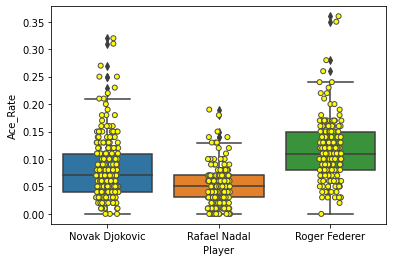

In [176]:
sns.boxplot(data=aces, x='Player', y='Ace_Rate')
sns.stripplot(data=aces, x='Player', y='Ace_Rate', color='yellow', linewidth=1)

In [170]:
# Curiosamente, apesar de ter o pior desempenho em primeiros saques entrando, Federer é quem possui maior percentual de Aces
# Isso pode também explicar o menor percentual de acertos de primeiro saque, por possivelmente se arriscar mais com saques
# mais difíceis, podendo conseguir assim mais aces

In [171]:
d = {'Player': djoko_df['Player'], 'Return_Points': djoko_df['Return_Points_Won']}
djoko_returns_df = pd.DataFrame(d)

d = {'Player': federer_df['Player'], 'Return_Points': federer_df['Return_Points_Won']}
federer_returns_df = pd.DataFrame(d)

d = {'Player': nadal_df['Player'], 'Return_Points': nadal_df['Return_Points_Won']}
nadal_returns_df = pd.DataFrame(d)

In [172]:
return_points = pd.concat([djoko_returns_df, nadal_returns_df, federer_returns_df], axis=0)

<AxesSubplot:xlabel='Player', ylabel='Return_Points'>

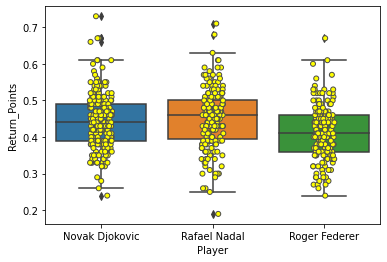

In [175]:
sns.boxplot(data=return_points, x='Player', y='Return_Points')
sns.stripplot(data=return_points, x='Player', y='Return_Points', color='yellow',linewidth=1)

In [90]:
# Em pontos conseguidos no saque do adversario Djokovic e Nadal aparecem praticamente empatados
# com alguns jogos mais excepcionais do tenista Sérvio. Federer apresenta desempenho um pouco inferior
# aos outros dois tenistas.

<h3> Torneios de maior dominância </h3>

In [112]:
nadal_rg = nadal_df[nadal_df['Tournament'] == 'Roland Garros']

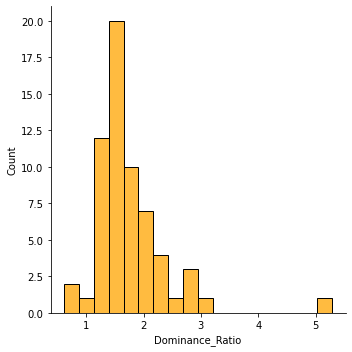

In [113]:
sns.displot(nadal_rg['Dominance_Ratio'], color='orange')

In [114]:
#Nadal possui um domínio muito grande em cima dos adversários no saibro, em Roland Garros principalmente.
# o Dominance Ratio indica o percentual de pontos conseguidos no saque adversario dividido pelo percentual de pontos
# perdidos no proprio saque, e nadal apresenta em quase todos os jogos uma razão acima de 1, com valores acima de 1.5
# e até acima de 2.0 bastante expressivos

In [115]:
djoko_aus = djoko_df[djoko_df['Tournament'] == 'Australian Open']

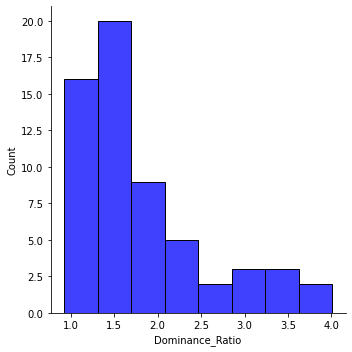

In [116]:
sns.displot(djoko_aus['Dominance_Ratio'], color='blue')

In [117]:
# Embora não possua a mesma quantidade de títulos que Nadal em Roland Garros, Djokovic possui 
# seu maior numero de titulos de Grand Slam na Australia, onde consistentemente supera seus adversários,
# fato que é constatado no Dominance Ratio, que praticamente não fica abaixo de 1.0, sempre o colocando  
# em uma situação de vantagem nas partidas

In [118]:
federer_wim = federer_df[federer_df['Tournament'] == 'Wimbledon']

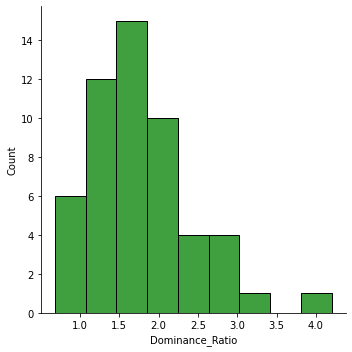

In [119]:
sns.displot(federer_wim['Dominance_Ratio'], color = 'green')

In [120]:
# A ultima decada não foi a melhor da carreira de Federer, que possui um total de 9 titulos no gramado de Wimbledon
# No entanto fica claro sua dominância nas partidas no torneio de Londres

<h3>Head2Head</h3>

In [147]:
djoko_df[djoko_df['Opponent'] == 'Roger Federer']

,Year,Tournament,Surface,Rd,Rk,vRk,Opponent,Result,Score,Dominance_Ratio,...,2nd%,Break_Points_Saved,Total_Points_Won,Return_Points_Won,Ace_Rate_Against,1st_return%,2nd_return%,Break_Points_Converted,Time,Player
33,2020,Australian Open,Hard,SF,2,3,Roger Federer,W,7-6(1) 6-4 6-3,1.31,...,0.54,5/7,0.55,0.42,0.14,0.34,0.58,4/11,2:18,Novak Djokovic
43,2019,Wimbledon,Grass,F,1,3,Roger Federer,W,7-6(5) 1-6 7-6(4) 4-6 13-12,0.87,...,0.47,6/13,0.48,0.32,0.12,0.21,0.49,3/8,4:57,Novak Djokovic
116,2016,Australian Open,Hard,SF,1,3,Roger Federer,W,6-1 6-2 3-6 6-3,1.64,...,0.66,3/4,0.58,0.44,0.05,0.39,0.51,5/9,2:19,Novak Djokovic
122,2015,US Open,Hard,F,1,2,Roger Federer,W,6-4 5-7 6-4 6-4,0.98,...,0.54,19/23,0.50,0.38,0.08,0.29,0.54,6/13,3:23,Novak Djokovic
129,2015,Wimbledon,Grass,F,1,2,Roger Federer,W,7-6(1) 6-7(10) 6-4 6-3,1.10,...,0.60,6/7,0.52,0.34,0.10,0.26,0.51,4/10,2:59,Novak Djokovic
156,2014,Wimbledon,Grass,F,2,4,Roger Federer,W,6-7(7) 6-4 7-6(4) 5-7 6-4,1.12,...,0.65,4/7,0.51,0.33,0.15,0.23,0.56,4/15,3:56,Novak Djokovic
209,2012,Wimbledon,Grass,SF,1,3,Roger Federer,L,6-3 3-6 6-4 6-3,0.76,...,0.57,8/11,0.47,0.26,0.12,0.25,0.28,1/3,2:19,Novak Djokovic
216,2012,Roland Garros,Clay,SF,1,3,Roger Federer,W,6-4 7-5 6-3,1.39,...,0.48,4/8,0.57,0.49,0.11,0.44,0.55,7/10,2:05,Novak Djokovic
230,2011,US Open,Hard,SF,1,3,Roger Federer,W,6-7(7) 4-6 6-3 6-2 7-5,1.30,...,0.55,2/5,0.53,0.37,0.07,0.33,0.44,6/12,3:51,Novak Djokovic


<AxesSubplot:xlabel='Result', ylabel='count'>

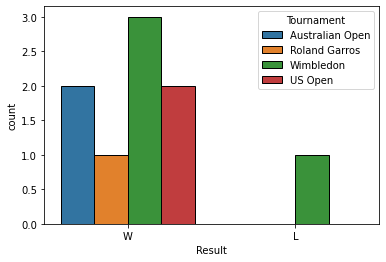

In [138]:
sns.countplot(x="Result", hue="Tournament", data=djoko_df[djoko_df['Opponent'] == 'Roger Federer'],
             hue_order = ['Australian Open', 'Roland Garros', 'Wimbledon', 'US Open'], order=["W", "L"],
             edgecolor='black')

In [139]:
djoko_df[djoko_df['Opponent'] == 'Rafael Nadal']

,Year,Tournament,Surface,Rd,Rk,vRk,Opponent,Result,Score,Dominance_Ratio,...,2nd%,Break_Points_Saved,Total_Points_Won,Return_Points_Won,Ace_Rate_Against,1st_return%,2nd_return%,Break_Points_Converted,Time,Player
8,2021,Roland Garros,Clay,SF,1,3,Rafael Nadal,W,3-6 6-3 7-6(4) 6-2,1.17,...,0.50,10/16,0.53,0.47,0.05,0.41,0.60,8/22,4:11,Novak Djokovic
21,2020,Roland Garros,Clay,F,1,2,Rafael Nadal,L,6-0 6-2 7-5,0.66,...,0.49,11/18,0.42,0.33,0.05,0.33,0.35,1/5,2:41,Novak Djokovic
56,2019,Australian Open,Hard,F,1,2,Rafael Nadal,W,6-3 6-2 6-3,2.40,...,0.84,1/1,0.63,0.45,0.04,0.49,0.39,5/8,2:04,Novak Djokovic
71,2018,Wimbledon,Grass,SF,21,1,Rafael Nadal,W,6-4 3-6 7-6(9) 3-6 10-8,1.12,...,0.47,7/11,0.51,0.36,0.04,0.33,0.43,4/19,5:15,Novak Djokovic
138,2015,Roland Garros,Clay,QF,1,7,Rafael Nadal,W,7-5 6-3 6-1,1.65,...,0.60,3/5,0.59,0.50,0.03,0.41,0.62,7/18,2:26,Novak Djokovic
163,2014,Roland Garros,Clay,F,2,1,Rafael Nadal,L,3-6 7-5 6-2 6-4,0.84,...,0.36,4/10,0.47,0.34,0.03,0.27,0.50,3/9,3:31,Novak Djokovic
175,2013,US Open,Hard,F,1,2,Rafael Nadal,L,6-2 3-6 6-4 6-1,0.84,...,0.49,5/11,0.46,0.38,0.01,0.35,0.44,3/11,3:21,Novak Djokovic
189,2013,Roland Garros,Clay,SF,1,4,Rafael Nadal,L,6-4 3-6 6-1 6-7(3) 9-7,0.82,...,0.53,8/16,0.47,0.33,0.04,0.28,0.40,5/9,4:37,Novak Djokovic
215,2012,Roland Garros,Clay,F,1,2,Rafael Nadal,L,6-4 6-3 2-6 7-5,0.91,...,0.44,8/17,0.48,0.42,0.03,0.38,0.47,7/10,3:49,Novak Djokovic
222,2012,Australian Open,Hard,F,1,2,Rafael Nadal,W,5-7 6-4 6-2 6-7(5) 7-5,1.21,...,0.63,2/6,0.52,0.41,0.05,0.35,0.53,7/20,5:53,Novak Djokovic


<AxesSubplot:xlabel='Result', ylabel='count'>

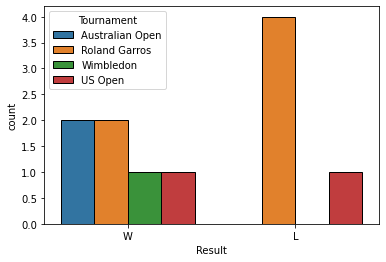

In [140]:
sns.countplot(x="Result", hue="Tournament", data=djoko_df[djoko_df['Opponent'] == 'Rafael Nadal'],
             hue_order = ['Australian Open', 'Roland Garros', 'Wimbledon', 'US Open'], order=["W", "L"],
             edgecolor='black')

In [141]:
nadal_df[nadal_df['Opponent'] == 'Roger Federer']
h2h_nadal_federer = 

,Year,Tournament,Surface,Rd,Rk,vRk,Opponent,Result,Score,Dominance_Ratio,...,2nd%,Break_Points_Saved,Total_Points_Won,Return_Points_Won,Ace_Rate_Against,1st_return%,2nd_return%,Break_Points_Converted,Time,Player
30,2019,Wimbledon,Grass,SF,2,3,Roger Federer,L,7-6(3) 1-6 6-3 6-4,0.85,...,0.48,8/10,0.48,0.30,0.12,0.27,0.38,2/8,3:02,Rafael Nadal
37,2019,Roland Garros,Clay,SF,2,3,Roger Federer,W,6-3 6-4 6-2,1.39,...,0.56,2/4,0.56,0.47,0.03,0.38,0.61,6/16,2:25,Rafael Nadal
92,2017,Australian Open,Hard,F,9,17,Roger Federer,L,6-4 3-6 6-1 3-6 6-3,0.87,...,0.56,14/20,0.48,0.34,0.15,0.24,0.51,4/17,3:37,Rafael Nadal
134,2014,Australian Open,Hard,SF,1,6,Roger Federer,W,7-6(4) 6-3 6-3,1.50,...,0.73,1/2,0.55,0.40,0.08,0.35,0.50,4/14,2:24,Rafael Nadal
164,2012,Australian Open,Hard,SF,2,3,Roger Federer,W,6-7(5) 6-2 7-6(5) 6-4,1.16,...,0.63,7/10,0.53,0.38,0.08,0.34,0.45,6/16,3:42,Rafael Nadal


<AxesSubplot:xlabel='Result', ylabel='count'>

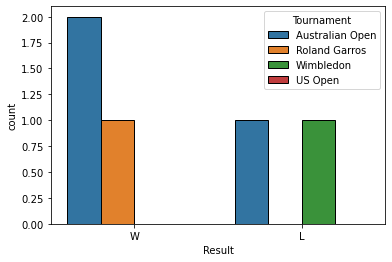

In [142]:
sns.countplot(x="Result", hue="Tournament", data=nadal_df[nadal_df['Opponent'] == 'Roger Federer'],
             hue_order = ['Australian Open', 'Roland Garros', 'Wimbledon', 'US Open'], order=["W", "L"],
             edgecolor='black')

<h1> Testes de Hipotese </h1>

In [184]:
# Vamos analisar a diferença do percentual de pontos ganhos quando o tenista joga com o primeiro saque
# e quando joga com o segundo saque

<h4>Novak Djokovic</h4>

In [188]:
df = djoko_df[['1st%', '2nd%']]

In [189]:
djoko_df[['1st%', '2nd%']].describe()

,1st%,2nd%
count,235.000000,235.000000
mean,0.765319,0.595702
std,0.078005,0.104046
min,0.500000,0.360000
25%,0.720000,0.530000
50%,0.760000,0.580000
75%,0.820000,0.670000
max,1.000000,0.890000


<AxesSubplot:>

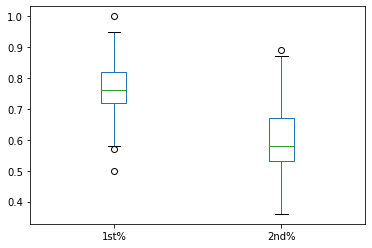

In [190]:
djoko_df[['1st%', '2nd%']].plot(kind='box')

In [191]:
# Verificando se a diferença segue a gaussiana
df['%_difference'] = df['1st%'] - df['2nd%']

<ipython-input-191-72699e74bfea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%_difference'] = df['1st%'] - df['2nd%']


<AxesSubplot:ylabel='Frequency'>

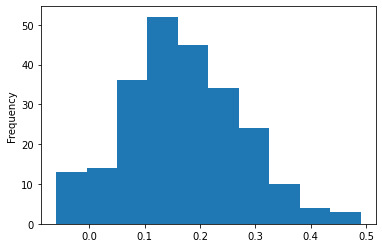

In [193]:
df['%_difference'].plot(kind='hist')

In [197]:
# Shapiro-Wilk teste de normalidade (valor, p-value)
stats.shapiro(df['%_difference'])

ShapiroResult(statistic=0.9897833466529846, pvalue=0.09603099524974823)

In [198]:
#Pelo fato da nossa distribuiçao ser uma normal (pvalue = 96%)
#então usaremos o t-test

In [199]:
stats.ttest_rel(df['1st%'], df['2nd%'])

Ttest_relResult(statistic=24.25011029561235, pvalue=8.768750708868794e-66)

In [200]:
# A probabilidade das duas distribuições serem iguais é muito baixa (pvalue=8.768750708868794e-66)

<AxesSubplot:>

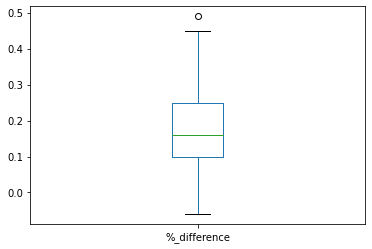

In [201]:
#Checando simetria
df['%_difference'].plot(kind='box')

<h4> Rafael Nadal </h4>

In [203]:
df = nadal_df[['1st%', '2nd%']]

In [204]:
nadal_df[['1st%', '2nd%']].describe()

,1st%,2nd%
count,175.000000,175.000000
mean,0.752171,0.594800
std,0.080857,0.108086
min,0.470000,0.290000
25%,0.700000,0.530000
50%,0.760000,0.600000
75%,0.820000,0.670000
max,0.910000,0.860000


<AxesSubplot:>

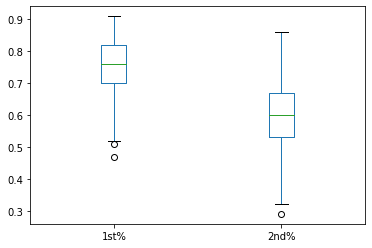

In [205]:
nadal_df[['1st%', '2nd%']].plot(kind='box')

In [206]:
# Verificando se a diferença segue a gaussiana
df['%_difference'] = df['1st%'] - df['2nd%']

<ipython-input-206-72699e74bfea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%_difference'] = df['1st%'] - df['2nd%']


<AxesSubplot:ylabel='Frequency'>

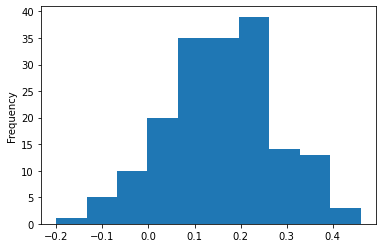

In [207]:
df['%_difference'].plot(kind='hist')

In [208]:
# Shapiro-Wilk teste de normalidade (valor, p-value)
stats.shapiro(df['%_difference'])

ShapiroResult(statistic=0.9958450198173523, pvalue=0.9127158522605896)

In [209]:
#Pelo fato da nossa distribuiçao ser uma normal (pvalue = 91%)
#então usaremos o t-test

In [210]:
stats.ttest_rel(df['1st%'], df['2nd%'])

Ttest_relResult(statistic=17.425269735765823, pvalue=5.297025143804393e-40)

In [212]:
# A probabilidade das duas distribuições serem iguais é muito baixa (pvalue=5.297025143804393e-40)

<AxesSubplot:>

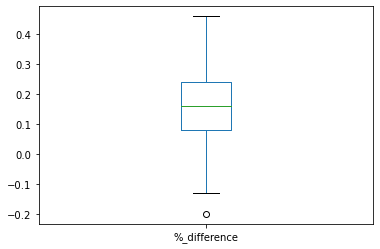

In [213]:
#Checando simetria
df['%_difference'].plot(kind='box')

In [214]:
df = federer_df[['1st%', '2nd%']]

In [215]:
federer_df[['1st%', '2nd%']].describe()

,1st%,2nd%
count,173.000000,173.000000
mean,0.797283,0.595260
std,0.073794,0.100837
min,0.560000,0.330000
25%,0.750000,0.520000
50%,0.800000,0.580000
75%,0.840000,0.670000
max,0.950000,0.820000


<AxesSubplot:>

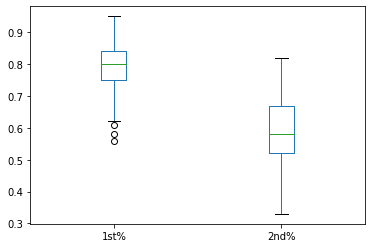

In [221]:
federer_df[['1st%', '2nd%']].plot(kind='box')

In [222]:
# Verificando se a diferença segue a gaussiana
df['%_difference'] = df['1st%'] - df['2nd%']

<ipython-input-222-72699e74bfea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%_difference'] = df['1st%'] - df['2nd%']


<AxesSubplot:ylabel='Frequency'>

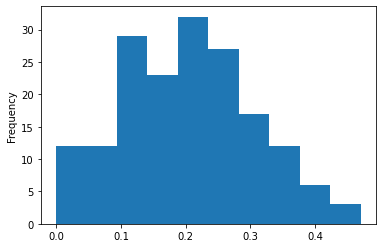

In [223]:
df['%_difference'].plot(kind='hist')

In [224]:
# Shapiro-Wilk teste de normalidade (valor, p-value)
stats.shapiro(df['%_difference'])

ShapiroResult(statistic=0.9889417886734009, pvalue=0.19598203897476196)

In [225]:
#Pelo fato da nossa distribuiçao não ser uma normal (pvalue = 19%)
#então usaremos o wilcoxon-test

In [226]:
stats.wilcoxon(df['1st%'], df['2nd%'])

WilcoxonResult(statistic=0.0, pvalue=5.5626469609210245e-30)

In [227]:
# A probabilidade das duas distribuições serem iguais é muito baixa (pvalue=5.5626469609210245e-30)

<AxesSubplot:>

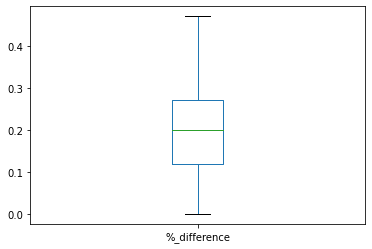

In [228]:
#Checando simetria
df['%_difference'].plot(kind='box')